In [3]:
import graphviz as gv
from queue import *

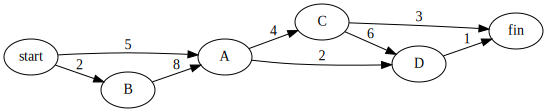

In [56]:
# Practice A

A = gv.Digraph('graph-a')
A.attr(rankdir='LR')
A.edge('start', 'A', label = '5')
A.edge('start', 'B', label = '2')
A.edge('B', 'A', label = '8')
A.edge('A', 'C', label = '4')
A.edge('A', 'D', label = '2')
A.edge('C', 'D', label = '6')
A.edge('C', 'fin', label = '3')
A.edge('D', 'fin', label = '1')
graph = graphviz.Source(A)  
graph

In [4]:
# build a graph
graphA = {}
graphA['start'] = {}
graphA['start']['A'] = 5
graphA['start']['B'] = 2

graphA['A'] = {}
graphA['A']['C'] = 4
graphA['A']['D'] = 2

graphA['B'] = {}
graphA['B']['A'] = 8
graphA['B']['D'] = 7

graphA['C'] = {}
graphA['C']['fin'] = 3
graphA['C']['D'] = 6

graphA['D'] = {}
graphA['D']['fin'] = 1

graphA['fin'] = None

In [67]:
# use breadth-first search 
def breadth_first_search_1(start, fin):
    wait_search = Queue()
    wait_search.put(start)
    searched = []
    while not wait_search.empty():
        node = wait_search.get()
        if node not in searched:
            if arrived_fin(node, fin):
                print('search 1 arrived ' + fin)
                return True
            else:
                next_node = graphA[node]
                if next_node is not None:
                    searched.append(node)
                    for nd in next_node.keys():
                        print(node + ' : ' + nd)
                        wait_search.put(nd)

                        
def breadth_first_search_2(start, fin):
    wait_search = Queue()
    wait_search.put(start)
    searched = []
    arrived = False
    while not wait_search.empty() and not arrived:
        node = wait_search.get()
        if node not in searched:
            next_node = graphA[node]
            if next_node is not None:
                searched.append(node)
                for nd in next_node.keys():
                    print(node + ' : ' + nd)
                    if arrived_fin(nd, fin):
                        print('search 2 arrived ' + fin)
                        arrived = True
                        break
                    else:
                        wait_search.put(nd)
    return arrived
    
    
def arrived_fin(node, fin):
    if node == fin:
        return True
    else:
        return False
start = 'start'
fin = 'C'
breadth_first_search_1(start, fin)
breadth_first_search_2(start, fin)
    


start : A
start : B
A : C
A : D
B : A
B : D
search 1 arrived C
start : A
start : B
A : C
search 2 arrived C


True

In [35]:
# Dijkstra's algorithm

def shortest_path(start, fin):
    infinity = float('inf')
    searched = []
    shortest = {}
    for x in graphA.keys():
        shortest[x] = infinity
    shortest[start] = 0
    parent = {}
    curr_node = start
    while curr_node is not None and not curr_node == fin:
        print('search ' + curr_node)
        searched.append(curr_node)
        next_node = graphA[curr_node]
        cost = shortest[curr_node]
        if next_node is not None:
            for key in next_node.keys():
                distance = shortest[curr_node] + next_node[key]
                if distance < shortest[key]:
                    shortest[key] = distance
                    parent[curr_node] = key
            print(shortest)
            print(parent)
        curr_node = get_shortest_node(shortest, searched)

                
def get_shortest_node(shortest, searched):
    low_cost = float('inf')
    low_cost_node = None
    for node in shortest:
        cost = shortest[node]
        if node not in searched and  cost < low_cost:
            low_cost = cost
            low_cost_node = node
    return low_cost_node

start = 'start'
fin = 'fin'
shortest_path(start, fin)

search start
{'start': 0, 'A': 5, 'B': 2, 'C': inf, 'D': inf, 'fin': inf}
{'start': 'B'}
search B
{'start': 0, 'A': 5, 'B': 2, 'C': inf, 'D': 9, 'fin': inf}
{'start': 'B', 'B': 'D'}
search A
{'start': 0, 'A': 5, 'B': 2, 'C': 9, 'D': 7, 'fin': inf}
{'start': 'B', 'B': 'D', 'A': 'D'}
search D
{'start': 0, 'A': 5, 'B': 2, 'C': 9, 'D': 7, 'fin': 8}
{'start': 'B', 'B': 'D', 'A': 'D', 'D': 'fin'}
